In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer , TfidfVectorizer , CountVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, roc_auc_score
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec, KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
from sklearn. preprocessing import normalize, StandardScaler
from sklearn import datasets, neighbors

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import tree




from scipy.sparse import load_npz

path = "C:/Python/Assignments/Preprocessing/"

def opn(name):
    with open(path + name , "rb") as file:
        return pickle.load(file)

train_bow = load_npz(path + "train_bow.npz")
test_bow = load_npz(path + "test_bow.npz")
cv_bow = load_npz(path + "cv_bow.npz")

train_tfidf = load_npz(path + "train_tfidf.npz")
test_tfidf = load_npz(path + "test_tfidf.npz")
cv_tfidf = load_npz(path + "cv_tfidf.npz")

with open(path +"X_test.txt", "rb") as file:
    X_test = pickle.load(file)
with open(path +"X_train.txt", "rb") as file:
    X_train = pickle.load(file)
with open(path +"X_cv.txt", "rb") as file:
    X_cv = pickle.load(file)
    
with open(path +"Y_test.txt", "rb") as file:
    Y_test = pickle.load(file)
with open(path +"Y_train.txt", "rb") as file:
    Y_train = pickle.load(file)
with open(path +"Y_cv.txt", "rb") as file:
    Y_cv = pickle.load(file)

with open(path + "X_cv_sum.txt", "rb") as file:
    X_cv_sum = pickle.load(file)
with open(path + "X_train_sum.txt", "rb") as file:
    X_train_sum = pickle.load(file)
with open(path + "X_test_sum.txt", "rb") as file:
    X_test_sum = pickle.load(file)

with open(path + "train_avgw2v.txt", "rb") as file:
    train_avgw2v = pickle.load(file)
with open(path + "cv_avgw2v.txt", "rb") as file:
    cv_avgw2v = pickle.load(file)
with open(path + "test_avgw2v.txt", "rb") as file:
    test_avgw2v = pickle.load(file)

with open(path + "train_tfw2v.txt", "rb") as file:
    train_tfw2v = pickle.load(file)
with open(path + "cv_tfw2v.txt", "rb") as file:
    cv_tfw2v = pickle.load(file)
with open(path + "test_tfw2v.txt", "rb") as file:
    test_tfw2v = pickle.load(file)
    

C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# [5] Assignment 9: Random Forests

<ol>
    <li><strong>Apply Random Forests & GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider two hyperparameters: n_estimators & max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 20 important features and represent them in a word cloud. Do this for BOW & TFIDF.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>(or)</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## [5.1] Applying RF

In [7]:
from sklearn.ensemble import RandomForestClassifier
def rf(train1,test1,cv1):

    sc = StandardScaler(with_mean=False)
    train = sc.fit_transform(train1)    
    cv = sc.fit_transform(cv1)
    test = sc.transform(test1)
    
    estimator = [20,40,60,80,100]
    depth = [10, 50,100,500,1000]
    parameter = {'n_estimators':estimator, 'max_depth':depth}
    
    clf = GridSearchCV(RandomForestClassifier(),parameter,verbose=1,scoring='roc_auc',n_jobs=-1)
    clf.fit(train,Y_train)
    estimator_opt, depth_opt = clf.best_params_.get('n_estimators'), clf.best_params_.get('max_depth')
   
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    

    
    df_heatmap = pd. DataFrame(train_score.reshape(len(estimator), len(depth)), index=estimator, columns=depth )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Estimator' , size=18)
    plt. xlabel('Depth' , size=18)
    plt. title("Train Data", size=24)
    plt. show()
    
    df_heatmap = pd. DataFrame(test_score.reshape(len(estimator), len(depth)), index=estimator, columns=depth )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Estimator' , size=18)
    plt. xlabel('Depth' , size=18)
    plt. title("CV Data", size=24)
    plt. show()
    
    print("The optimal value of n_estimator = ", estimator_opt , " And max_depth is : ", depth_opt)
    
    clf = RandomForestClassifier(max_depth=depth_opt,n_estimators=estimator_opt,random_state=0)
    clf.fit(train,Y_train)
    
    
    pred = clf.predict(test)
    pred_train = clf.predict(train)
    pred_prob = clf.predict_proba(test)
    pred_prob_train = clf.predict_proba(train)
    
    fpr, tpr, threshold = roc_curve(Y_train, pred_prob_train[:,1])
    fpr1, tpr1, threshold1 = roc_curve(Y_test, pred_prob[:,1])
    print("The AUC value for test data is ",roc_auc_score(Y_test, pred_prob[:,1]))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    
    # CM train
    #Confusion Matrix
    cm = confusion_matrix(Y_train,pred_train)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix for Train Data\n",size=24)
    plt.show()
    
    #Confusion Matrix
    cm = confusion_matrix(Y_test,pred)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix for Test Data\n",size=24)
    plt.show()

### [5.1.1] Applying Random Forests on BOW,<font color='red'> SET 1</font>

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 33.0min finished


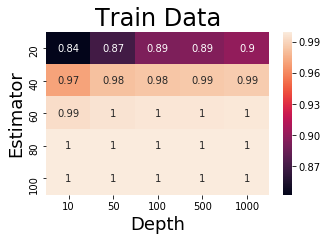

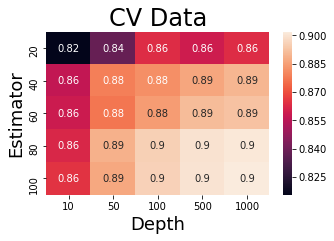

The optimal value of n_estimator =  100  And max_depth is :  1000
The AUC value for test data is  0.9050764017301476


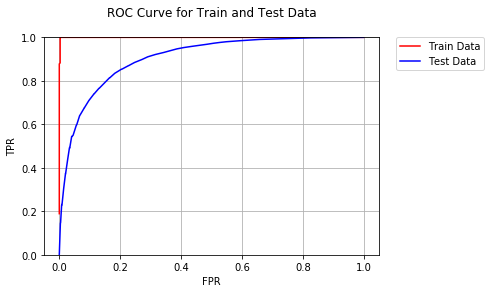

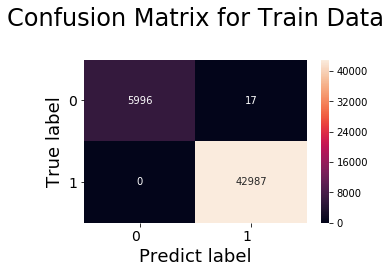

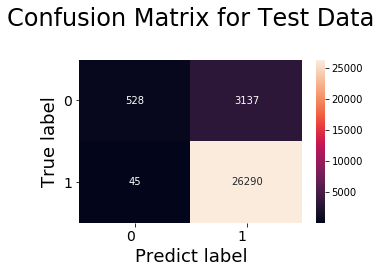

In [10]:
# Please write all the code with proper documentation
rf(train_bow,test_bow,cv_bow)

### [5.1.2] Wordcloud of top 20 important features from<font color='red'> SET 1</font>

In [45]:
# Please write all the code with proper documentation
clf = RandomForestClassifier(max_depth=1000,n_estimators=100,random_state=0)
clf.fit(train_bow,Y_train)
feat_log = clf.feature_importances_

count_vect = CountVectorizer()
p = count_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = count_vect.get_feature_names()

q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)


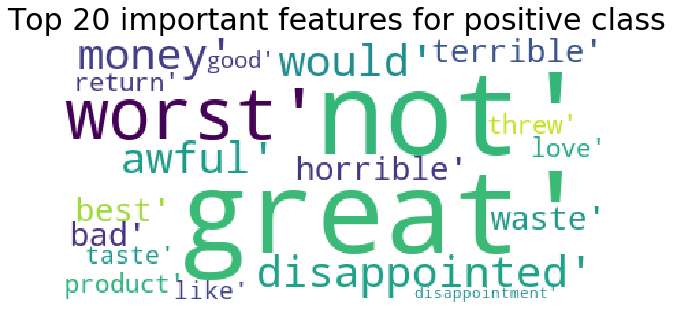

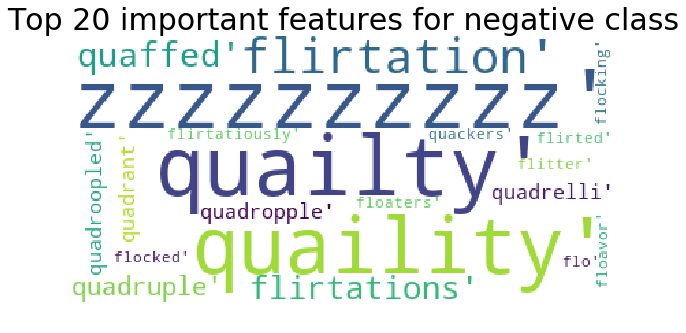

In [162]:
positive = q['feature'][:20]
negat = q['feature'][:q.shape[0]-21:-1]


# https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False, background_color ='white', 
                min_font_size = 10).generate(str(list(positive)))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top 20 important features for positive class",size= 30,)
plt.show() 


wordcloud = WordCloud(collocations=False, background_color ='white', 
                min_font_size = 10).generate(str(list(negat)))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Top 20 important features for negative class",size = 30)
  
plt.show() 

### [5.1.3] Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 14.5min finished


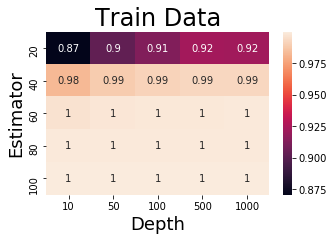

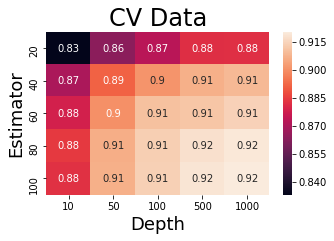

The optimal value of n_estimator =  100  And max_depth is :  1000
The AUC value for test data is  0.9234393975617445


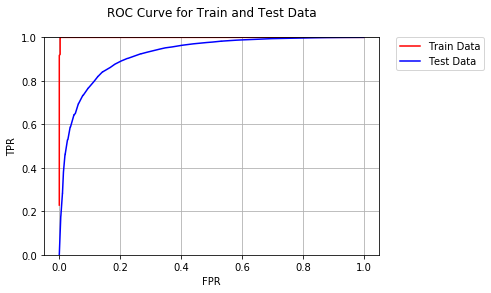

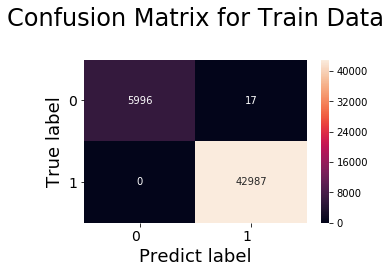

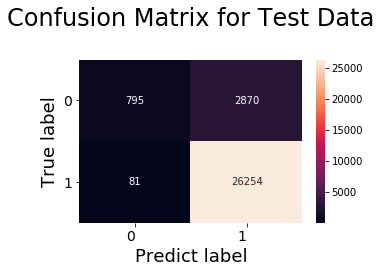

In [11]:
# Please write all the code with proper documentation
rf(train_tfidf,test_tfidf,cv_tfidf)

### [5.1.4] Wordcloud of top 20 important features from<font color='red'> SET 2</font>

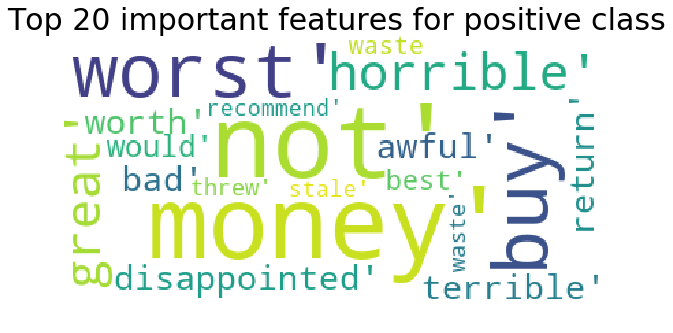

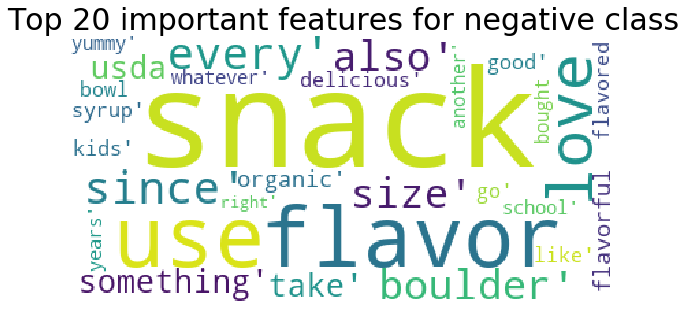

In [164]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
clf = RandomForestClassifier(max_depth=1000,n_estimators=100,random_state=0)
clf.fit(train_tfidf,Y_train)
feat_log = clf.feature_importances_

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
p = tf_idf_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = tf_idf_vect.get_feature_names()

q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)

positive = q['feature'][:20]
negat = q['feature'][:q.shape[0]-21:-1]


# https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False, background_color ='white', 
                min_font_size = 10).generate(str(list(positive)))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top 20 important features for positive class",size= 30,)
plt.show() 


wordcloud = WordCloud(collocations=False, background_color ='white', 
                min_font_size = 10).generate(str(list(negat)))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Top 20 important features for negative class",size = 30)
  
plt.show() 

### [5.1.5] Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  9.0min finished


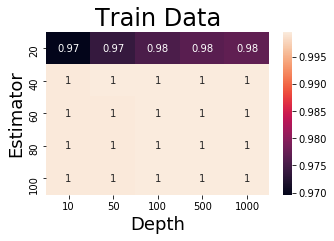

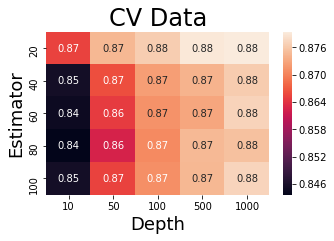

The optimal value of n_estimator =  100  And max_depth is :  10
The AUC value for test data is  0.8837143261953562


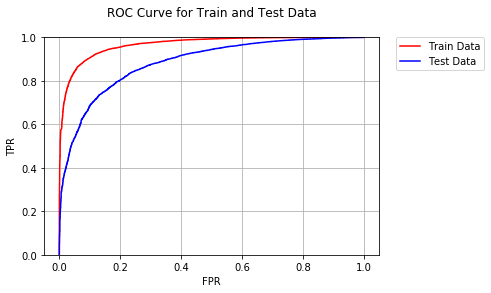

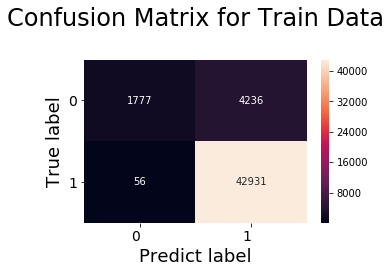

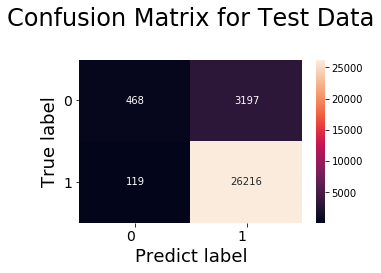

In [8]:
# Please write all the code with proper documentation
rf(train_avgw2v,test_avgw2v,cv_avgw2v)

### [5.1.6] Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  9.2min finished


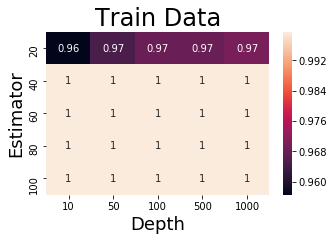

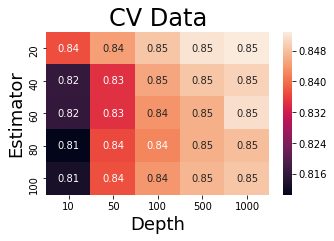

The optimal value of n_estimator =  100  And max_depth is :  10
The AUC value for test data is  0.8541486943726169


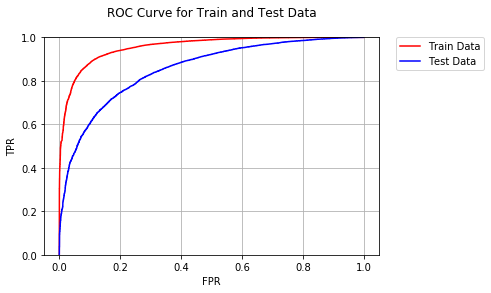

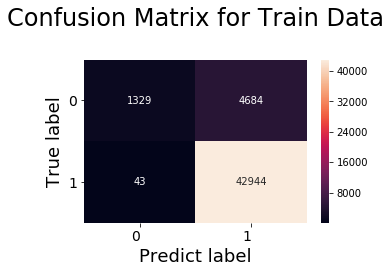

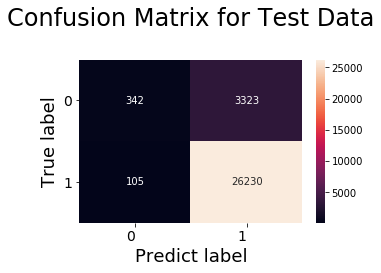

In [9]:
# Please write all the code with proper documentation
rf(train_tfw2v,test_tfw2v,cv_tfw2v)

## [5.2] Applying GBDT using XGBOOST

In [2]:
import xgboost as xgb
def rfx(train1,test1,cv1):

    sc = StandardScaler(with_mean=False)
    train = sc.fit_transform(train1)    
    cv = sc.fit_transform(cv1)
    test = sc.transform(test1)
    
    estimator = [50,100,200,400,500]
    depth = [2,3,5,8,10]
    parameter = {'n_estimators':estimator, 'max_depth':depth}
    
    clf = GridSearchCV(xgb.XGBClassifier(),parameter,verbose=1,scoring='roc_auc',n_jobs=-1)
    clf.fit(train,Y_train)
    estimator_opt, depth_opt = clf.best_params_.get('n_estimators'), clf.best_params_.get('max_depth')
   
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    

    
    df_heatmap = pd. DataFrame(train_score.reshape(len(estimator), len(depth)), index=estimator, columns=depth )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Estimator' , size=18)
    plt. xlabel('Depth' , size=18)
    plt. title("Train Data", size=24)
    plt. show()
    
    df_heatmap = pd. DataFrame(test_score.reshape(len(estimator), len(depth)), index=estimator, columns=depth )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Estimator' , size=18)
    plt. xlabel('Depth' , size=18)
    plt. title("CV Data", size=24)
    plt. show()
    
    print("The optimal value of n_estimator = ", estimator_opt , " And max_depth is : ", depth_opt)
    
    clf = xgb.XGBClassifier(max_depth=depth_opt,n_estimators=estimator_opt)
    clf.fit(train,Y_train)
    
    
    pred = clf.predict(test)
    pred_train = clf.predict(train)
    pred_prob = clf.predict_proba(test)
    pred_prob_train = clf.predict_proba(train)
    
    fpr, tpr, threshold = roc_curve(Y_train, pred_prob_train[:,1])
    fpr1, tpr1, threshold1 = roc_curve(Y_test, pred_prob[:,1])
    print("The AUC value for test data is ",roc_auc_score(Y_test, pred_prob[:,1]))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    
    # CM train
    #Confusion Matrix
    cm = confusion_matrix(Y_train,pred_train)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix for Train Data\n",size=24)
    plt.show()
    
    

    #Confusion Matrix
    cm = confusion_matrix(Y_test,pred)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix\n",size=24)
    plt.show()

### [5.2.1] Applying XGBOOST on BOW,<font color='red'> SET 1</font>

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 21.8min finished


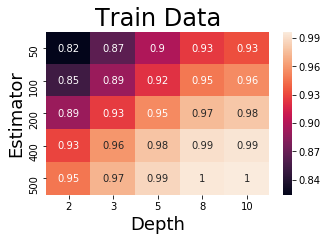

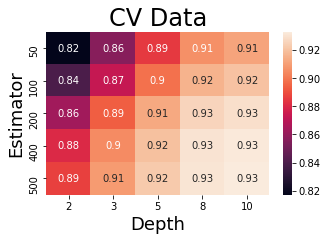

The optimal value of n_estimator =  500  And max_depth is :  10
The AUC value for test data is  0.9330505235952651


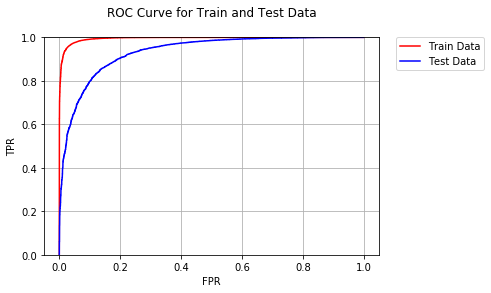

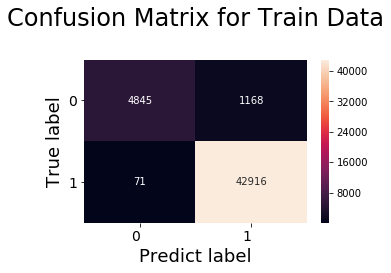

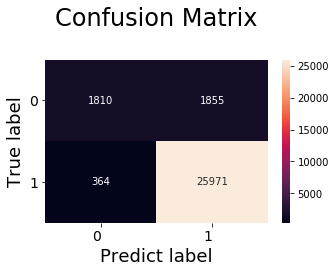

In [13]:
# Please write all the code with proper documentation
rfx( train_bow, test_bow, cv_bow)

### [5.2.2] Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 53.6min finished


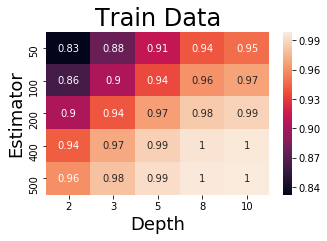

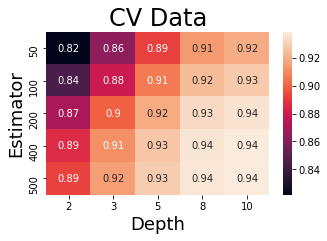

The optimal value of n_estimator =  500  And max_depth is :  8
The AUC value for test data is  0.9424460675766718


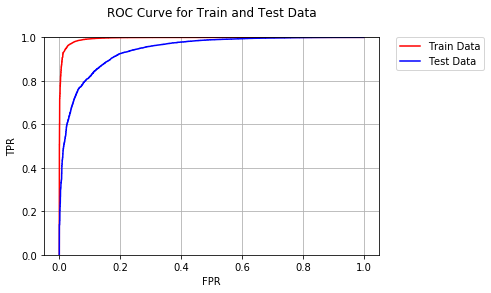

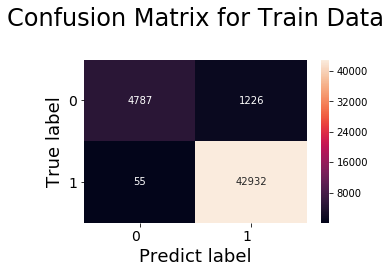

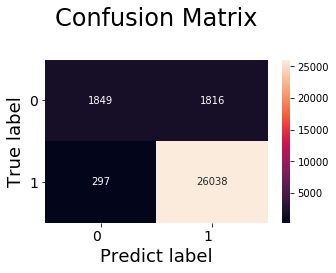

In [14]:
# Please write all the code with proper documentation
rfx(train_tfidf,test_tfidf,cv_tfidf)

### [5.2.3] Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 42.8min finished


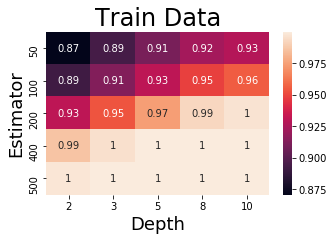

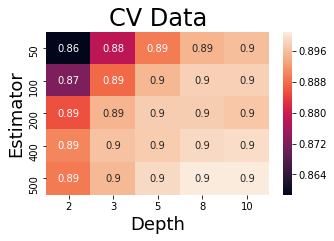

The optimal value of n_estimator =  500  And max_depth is :  10
The AUC value for test data is  0.9027710025433139


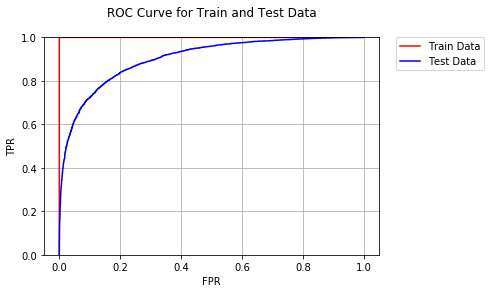

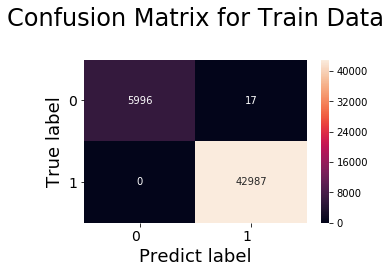

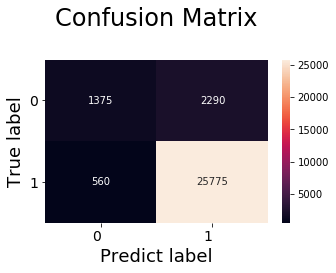

In [16]:
# Please write all the code with proper documentation
rfx(train_avgw2v,test_avgw2v,cv_avgw2v)

### [5.2.4] Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 38.8min finished


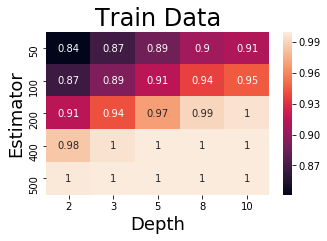

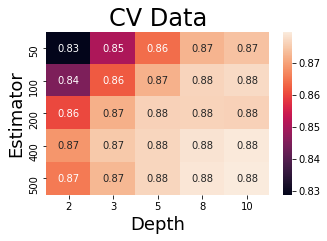

The optimal value of n_estimator =  500  And max_depth is :  10


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The AUC value for test data is  0.8814755313205261


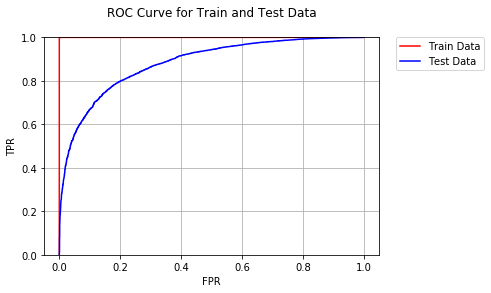

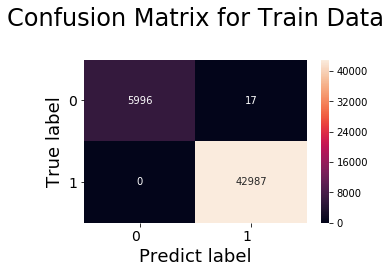

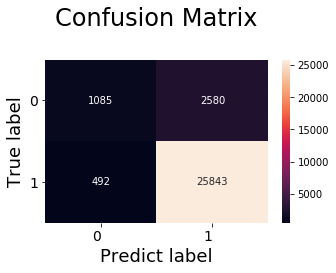

In [3]:
# Please write all the code with proper documentation
rfx(train_tfw2v,test_tfw2v,cv_tfw2v)

# [6] Conclusions

In [1]:
# Please compare all your models using Prettytable library
from prettytable import from_csv
with open("table.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------+---------------+--------------+-----------+------+
| Vectorizer |     Method    | n_estimators | max_depth | AUC  |
+------------+---------------+--------------+-----------+------+
|    BOW     | Random Forest |     100      |    1000   | 0.91 |
|   TFIDF    | Random Forest |     100      |    1000   | 0.92 |
|  AVG W2V   | Random Forest |     100      |     10    | 0.89 |
| TFIDF W2V  | Random Forest |     100      |     10    | 0.86 |
|    BOW     |    XGBOOST    |     500      |     10    | 0.93 |
|   TFIDF    |    XGBOOST    |     500      |     8     | 0.94 |
|  AVG W2V   |    XGBOOST    |     500      |     10    | 0.9  |
| TFIDF W2V  |    XGBOOST    |     500      |     10    | 0.88 |
+------------+---------------+--------------+-----------+------+


1. GBDT with XGBOOST is better with bow and tfidf featurization.
2. BOW and Avg W2v featurisation gave 93% ad 94% AUC value respectively.
3. We can further improve the model by taking more data points, and by taking some other features that may provide us with better insight about the data.
4. And the previous model we have applied have not given better results than this but this model takes more run time.